In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
sns.set_theme(style="darkgrid")

In [12]:
pd.read_csv("Databases/sales/Sales_April_2019.csv")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [15]:
Files = [file for file in os.listdir("Databases/sales/")]
Data=pd.DataFrame()
#Merging files
for f in Files :
    df=pd.read_csv("Databases/sales/"+f)
    Data =Data.append(df)
Data.to_csv("AllData.csv", index=False)


C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\3966604657.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data =Data.append(df)
C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\3966604657.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data =Data.append(df)
C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\3966604657.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data =Data.append(df)
C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\3966604657.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data =Data.append(df)
C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\3966604657.py:6: FutureWarning: The frame.append metho

In [16]:
#Reading the new csv
all_data=pd.read_csv("./AllData.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [18]:
#Clean the data
Nan=all_data[all_data.isna().any(axis=1)]
all_data=all_data.dropna(how="any")

In [19]:
all_data= all_data[all_data["Order Date"].str[0:2] != "Or"]

In [20]:
#Adding a "Month column"
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype('int32')
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [21]:
#Adding "sales" column  
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype('float64')
all_data["Price Each"]=all_data["Price Each"].astype('float64')
all_data["Sales"]=all_data.iloc[:,2]*all_data.iloc[:,3]
cols=list(all_data.columns.values)
all_data=all_data[cols[0:4]+[cols[-1]]+cols[4:7]]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1.0,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1.0,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1.0,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [22]:
#Best month for sales
graph=all_data.groupby("Month").sum()[["Sales"]]
print(graph)

            Sales
Month            
1      1822256.73
2      2202022.42
3      2807100.38
4      3390670.24
5      3152606.75
6      2577802.26
7      2647775.76
8      2244467.88
9      2097560.13
10     3736726.88
11     3199603.20
12     4613443.34


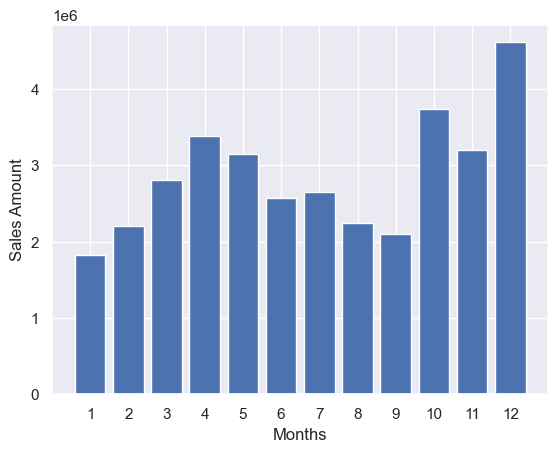

Best month for sales is December


In [23]:
#Ploting
months=range(1,13)
plt.bar(months , graph["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales Amount")
plt.show()
print("Best month for sales is December")

In [24]:
print(months)

range(1, 13)


In [25]:
#Adding a city column
all_data["City"]=all_data["Purchase Address"].apply(lambda x : x.split(",")[1]+" "+x.split(" ")[4])
all_data.head()

C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\1623789166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"]=all_data["Purchase Address"].apply(lambda x : x.split(",")[1]+" "+x.split(" ")[4])


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2.0,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1.0,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles Angeles,"
4,176560,Wired Headphones,1.0,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles Angeles,"
5,176561,Wired Headphones,1.0,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles Angeles,"


In [26]:
#Best city in sales
bar=all_data.groupby("City").sum()[["Sales"]]
print(bar)

                                Sales
City                                 
 Atlanta GA                2795498.58
 Austin TX                 1819581.75
 Boston MA                 3661642.01
 Dallas TX                 2767975.40
 Los Angeles Angeles,      5452570.80
 New York City York        4664317.43
 Portland ME                449758.27
 Portland OR               1870732.34
 San Francisco Francisco,  8262203.91
 Seattle WA                2747755.48


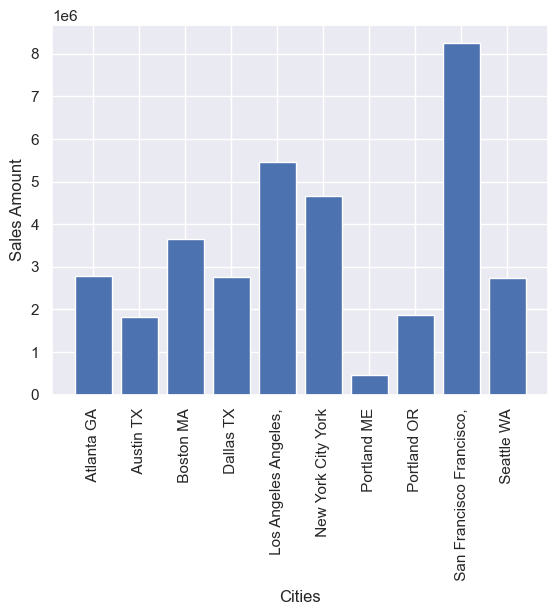

The best city in sales is San Francisco


In [27]:
#Ploting the situation
cities=[city for city,x in all_data.groupby("City")]
plt.bar(cities ,bar["Sales"] )
plt.xticks(cities,rotation="vertical" )
plt.xlabel("Cities")
plt.ylabel("Sales Amount")
plt.show()
print("The best city in sales is San Francisco")

In [28]:
#Converting Date & Time
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\3630507744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


In [29]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute
all_data.head()

C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\4290164541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Hour"]=all_data["Order Date"].dt.hour
C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\4290164541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Minute"]=all_data["Order Date"].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston MA,22,30
3,176560,Google Phone,1.0,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles Angeles,",14,38
4,176560,Wired Headphones,1.0,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles Angeles,",14,38
5,176561,Wired Headphones,1.0,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles Angeles,",9,27


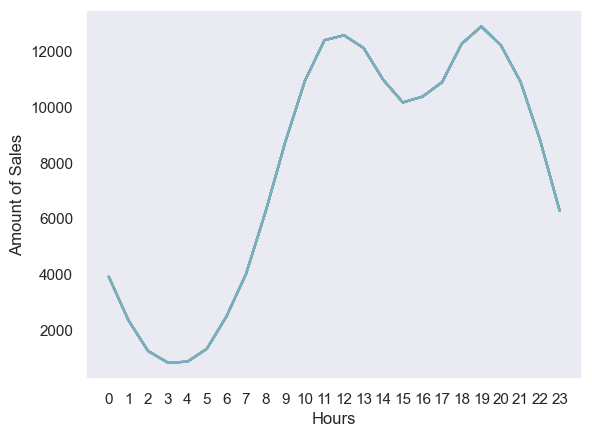

Best time to advertise is around 11am and 7pm


In [30]:
#Best time to advertise 
hours=[hour for hour ,x in all_data.groupby("Hour")]
plt.plot(hours,all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Amount of Sales")
plt.show()
print("Best time to advertise is around 11am and 7pm")

In [32]:
#This doesn't have a relation with the Data but what ever......
dup=all_data[all_data["Order ID"].duplicated(keep=False)]
dup["Grouped Orders"]=dup.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
dup=dup[["Order ID","Grouped Orders"]].drop_duplicates()
dup

C:\Users\tatai\AppData\Local\Temp\ipykernel_14520\485578864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup["Grouped Orders"]=dup.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))


,Order ID,Grouped Orders
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


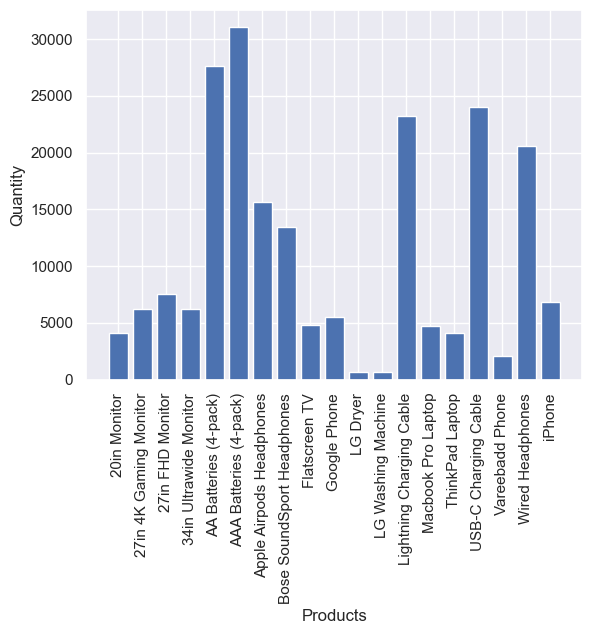

The most ordered Product is AAA Batteries(4-pack)


In [31]:
#The most ordered Product 
most=all_data.groupby("Product").sum()[["Quantity Ordered"]]
#sorted_values=most.sort_values("Quantity Ordered"",ascending=False)
Products=[product for product , x in all_data.groupby("Product")]
plt.bar(Products,most["Quantity Ordered"])
plt.xticks(Products, rotation="vertical")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.show()
print("The most ordered Product is AAA Batteries(4-pack)")

In [33]:
string="helo"
true=""
for i in string :
    if i==string[string.index(i)+1]:
        true="true"
        break
    elif string.index(i)+1>len(string):
        true="false"
    else:
        true= "false"
print(true) 

IndexError: string index out of range

In [6]:
def div_3(x):
    if x%3==0:
        return "True"
    else :
        return "false"
div_3(5)

'false'

In [6]:
def only_int(x,y):
    if (str(x).isdigit()) and (str(y).isdigit() ):
        return "True"
    else :
        return "False"
only_int("k",2)

'False'

In [18]:
def is_anagram(x,y):
    if "".join(sorted(x.lower()))=="".join(sorted(y.lower())):
        return "True"
    else:
        return "False"
is_anagram("tYphoon", "opython")

'True'

In [25]:
def add_dots(x):
    return x.replace("",".")[1:-1]
add_dots("test")

't.e.s.t'

In [27]:
def remove_dots(x):
    return x.replace(".","")
remove_dots("t.e.s.t")

'test'

In [3]:
def consecutive_zeros(x):
    # list=[]
    # for i in x.split("1") :
    #     list.append(i)
    # return len(max(list))
    return max([len(i) for i in x.split("1")])
consecutive_zeros("1001101000110")

3

In [34]:
def param_count(*args):
    list=[]
    for i in args:
        list.append(i)
    return len(list)
param_count(2,3,4)

3

In [6]:
len([i for i in str(input(""))])

9

In [4]:
def triple_and(x,y,z):
    if (x==1) & (y==1) & (z==1):
        return "True"
    else:
        return "False"
triple_and(True,5,True)


'False'

In [19]:
def all_equal(list):
    for i in list :
        if  list.count(i)==len(list):
            return "True"
        else:
            return "False"
all_equal([1,1,1,1,1,1,1,1,2,2,2,2])

'False'

In [1]:
def days_elapsed1(x,y):
    day=["Sunday","Monday","Thusday","Wednesday","Thursday","Friday","Saturday"]
    if 6<x<0 or y<0:
        return "invalid input"
    for i in range(0,7):
        if i==x :
            day.extend(day)
            return f"The day is {day[i]} and {y} days passed it will be {day[i+y]}"
        elif y>7 :
            day=day*y
            return f"The day is {day[i]} and {y} days passed it will be {day[i+y]}"
        elif x<0 or x>6 :
            return "Invalid day number"
days_elapsed1(6,255)

'The day is Sunday and 255 days passed it will be Wednesday'

In [67]:
def duplicate_zeros(x:list)->list:
    # your code here
    for i in range(len(x)+x.count(0)):
        if x[i]==0:
            x.insert(i+1,"0")
    return [int(y) for y in x]            
duplicate_zeros([1, 0, 2, 3, 0, 4, 5, 0])

[1, 0, 0, 2, 3, 0, 0, 4, 5, 0, 0]

In [3]:
sum=0
for i in str(input("enter a number")):
    sum+=int(i)
print(sum)

14


In [14]:
import statistics
from statistics import mode
data=["a", "b", "c", "a", "b", "a"]
mode(data)

'a'

In [49]:
a=1
list=[10**i for i in range(1,5)]
if a==0:
    print(1)
else:
    for i in list : 
        if a%i==0:
            f=i
str(f).count("0")

SyntaxError: 'return' outside function (4198998233.py, line 4)

In [1]:
sorted([int(i) for i in str(input("enter numbers"))])

[1, 1, 2, 4, 4, 5, 5, 6, 6, 7, 8, 9]

In [3]:
xy=pd.DataFrame({"x":[4,8,8,9,10,10,2,3,10,11,11,14,8,15,7,11,11,5],
                 "y":[6,13,10,11,10,9,8,7,8,11,8,7,14,7,2,10,9,4]})

In [5]:
xy

,x,y
0,4,6
1,8,13
2,8,10
3,9,11
4,10,10
5,10,9
6,2,8
7,3,7
8,10,8
9,11,11


In [16]:
table1=pd.crosstab(xy.x,xy.y, margins = False)
table1

y,2,4,6,7,8,9,10,11,13,14
x,,,,,,,,,,
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,1,1
9,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,1,1,1,0,0,0
11,0,0,0,0,1,1,1,1,0,0


In [29]:
f/18-9.5*8.94

-2.652222222222221

In [20]:
data=pd.DataFrame({"y":[35,16,8,21,18,10,6],"x1":[5,6,4,3,0,7,8],"x2":[38,17,11,14,12,8,1]})

In [22]:
Y=data["y"]
X=data[["x1","x2"]]

In [12]:
import statsmodels.api as sm

In [25]:
X=sm.add_constant(X)
sm.OLS(Y,X).fit().summary()

c:\Users\tatai\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     17.51
Date:                Thu, 03 Nov 2022   Prob (F-statistic):             0.0105
Time:                        14:36:14   Log-Likelihood:                -17.478
No. Observations:                   7   AIC:                             40.96
Df Residuals:                       4   BIC:                             40.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0635      4.038      1.997      0.117      -3.147      19.274
x1            -0.6224      0.600     -1.037      0.358      -2.288       1.043
x2             0.7732      0.140      5.537      0.005       0.386       1.161
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.357
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.889
Skew:                          -0.870   Prob(JB):                        0.641
Kurtosis:                       3.148   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
data["yhat"]=data.x1*model.coef_[[0]]+data.x2*model.coef_[[1]]+model.intercept_
data["e"]=data.y-data.yhat
data

,y,x1,x2,yhat,e
0,35,5,38,34.333544,0.666456
1,16,6,17,17.473767,-1.473767
2,8,4,11,14.079266,-6.079266
3,21,3,14,17.021273,3.978727
4,18,0,12,17.341988,0.658012
5,10,7,8,9.892503,0.107497
6,6,8,1,3.857659,2.142341


In [65]:
f=list(data.e)
f.pop(0)
g=list(data.e)
f1=[-1*i for i in f]
sum([sum(i)**2 for i in zip(g, f1 )])  

142.42521795314212

In [66]:
sum(data.e**2)

60.43806062973074

In [67]:
142.42521795314212/60.43806062973074

2.356548447603234

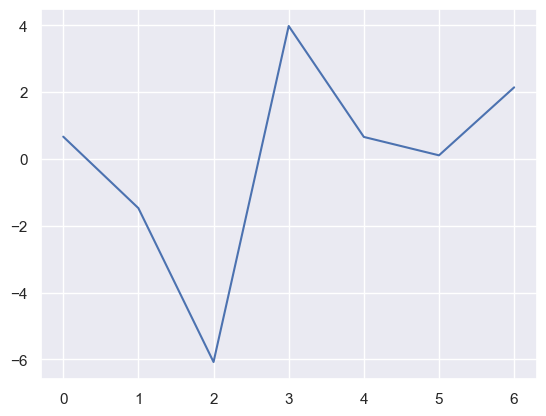

In [34]:
data.e.plot();

In [69]:
data.cov(
)

,y,x1,x2,yhat,e
y,98.238095,-8.904762e+00,1.068571e+02,8.816509e+01,1.007301e+01
x1,-8.904762,7.238095e+00,-5.690476e+00,-8.904762e+00,3.824616e-15
x2,106.857143,-5.690476e+00,1.336190e+02,1.068571e+02,-3.853605e-14
yhat,88.165085,-8.904762e+00,1.068571e+02,8.816509e+01,-3.362354e-14
e,10.073010,3.824616e-15,-3.853605e-14,-3.362354e-14,1.007301e+01


In [70]:
data.y.var()

98.23809523809524

In [18]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()
model=lm.fit(X,Y)
model.coef_

array([-0.62237807,  0.77320949])